<a href="https://colab.research.google.com/github/AjanitDevs/AjanitDevs/blob/main/brain_tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


IMPORTING NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os

DATA PREPROCESSING

In [3]:
path = os.listdir('/content/gdrive/MyDrive/project/Training/')

In [4]:
categories = {'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2}

In [5]:
import cv2

In [6]:
X = []
Y = []
for cls in categories:
    path = '/content/gdrive/MyDrive/project/Training/'+cls
    for j in os.listdir(path):
        img = cv2.imread(path+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(categories[cls])

In [7]:
X = np.array(X)
Y = np.array(Y)

X_new = X.reshape(len(X), -1)

In [8]:
np.unique(Y)

array([0, 1, 2])

In [9]:
X.shape

(2044, 200, 200)

In [10]:
X_new.shape

(2044, 40000)

DATA VISUALIZATION

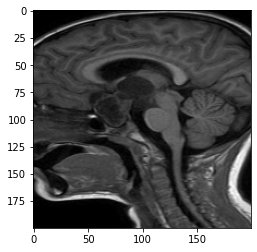

In [11]:
plt.imshow(X[0], cmap='gray')

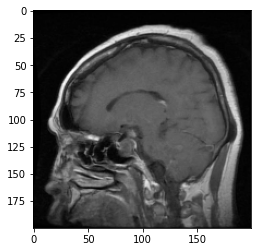

In [12]:
plt.imshow(X[800],cmap='gray')

SPLITTING THE DATA INTO TRAINING AND TESTING 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(X_new,Y,test_size = 0.20,random_state = 10)


In [15]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0


In [16]:
xtrain = xtrain/255
xtest = xtest/255

In [17]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

1.0 0.0
1.0 0.0


USING SUPPORT VECTOR MACHINE CLASSIFIER

In [18]:
from sklearn.svm import SVC

In [19]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [20]:
y_pred = sv.predict(xtest)

CHECKING THE ACCURACY

In [22]:
confusion_matrix(ytest,y_pred)

array([[ 66,  12,  12],
       [  1, 140,   4],
       [  9,  12, 153]])

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(ytest,y_pred)

0.8777506112469438

In [25]:
dictionary = {0:'No Tumor', 1:'pituitary tumor',2:'meningioma tumor'}

TESTING THE MODEL FOR UNSEEN DATA

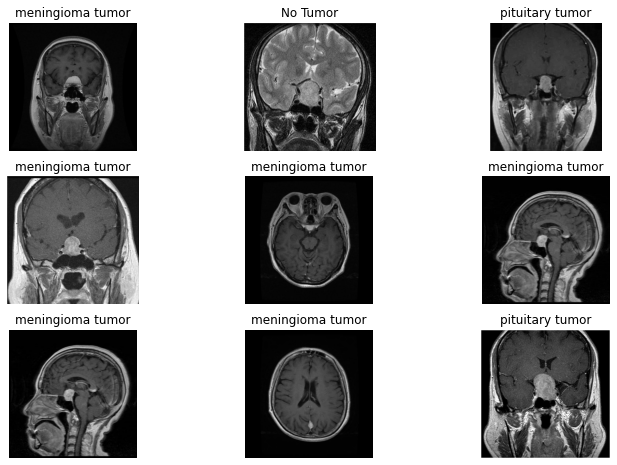

In [28]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/gdrive/MyDrive/project/Testing/')
c=1
for i in os.listdir('/content/gdrive/MyDrive/project/Testing/pituitary_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('/content/gdrive/MyDrive/project/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dictionary[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

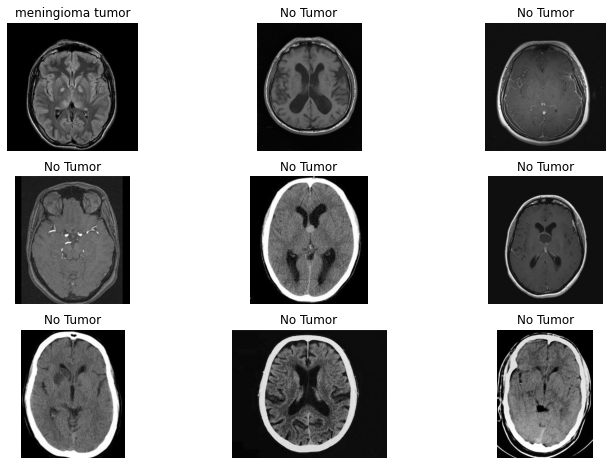

In [30]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/gdrive/MyDrive/project/Testing/')
c=1
for i in os.listdir('/content/gdrive/MyDrive/project/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('/content/gdrive/MyDrive/project/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dictionary[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1